In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression


In [4]:
df = pd.read_csv(Path('C:/Users/natnael/Documents/UCD Bootcamp/Mod20FinalProject/final_clean_data.csv'))
df.head(10)

,title,year released,certificate,duration_min,genre,rating,votes,age
0,Scarface,1932,PG,93,Action,7.7,"28,107",90
1,Dumbo,1941,G,64,Animation,7.2,"131,896",81
2,Nazi Concentration Camps,1945,Not Rated,59,Documentary,8.3,"1,481",77
3,Know Your Enemy - Japan,1945,Not Rated,63,Documentary,6.0,800,77
4,Along Came Jones,1945,Approved,90,Comedy,6.4,"2,163",77
5,Tomorrow Is Forever,1946,Not Rated,104,Drama,7.3,"2,637",76
6,The Stranger,1946,Passed,95,Crime,7.3,"26,705",76
7,Lured,1947,Approved,102,Crime,7.0,"3,811",75
8,He Walked by Night,1948,Approved,79,Crime,7.1,"6,083",74
9,"Sleep, My Love",1948,Passed,97,Drama,6.8,"1,827",74


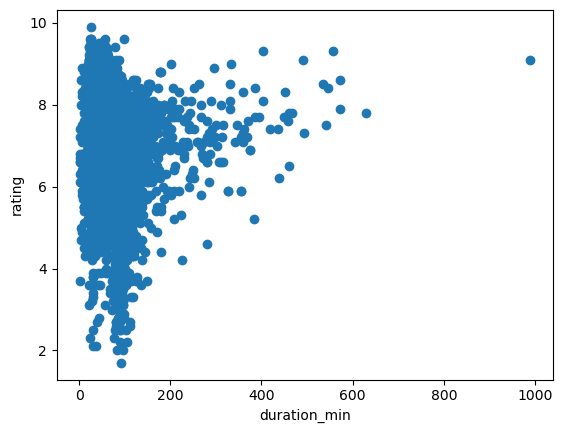

In [5]:
plt.scatter(df.duration_min,df.rating)
plt.xlabel('duration_min')
plt.ylabel('rating')
plt.show()

In [6]:
X = df.duration_min.values.reshape(-1, 1)

In [7]:
X[:5]

array([[93],
       [64],
       [59],
       [63],
       [90]], dtype=int64)

In [8]:
X.shape

(5511, 1)

In [9]:
y = df.rating

In [10]:
model = LinearRegression()

In [11]:
model.fit(X, y)

LinearRegression()

In [12]:
y_pred = model.predict(X)
print(y_pred.shape)

(5511,)


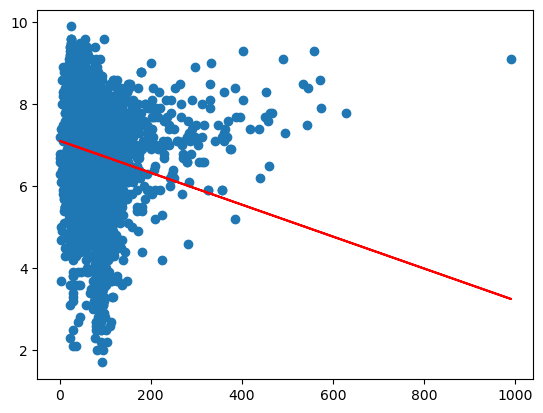

In [13]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [14]:
print(model.coef_)
print(model.intercept_)

[-0.00389936]
7.110588411748408


In [15]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.datasets import make_blobs
X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


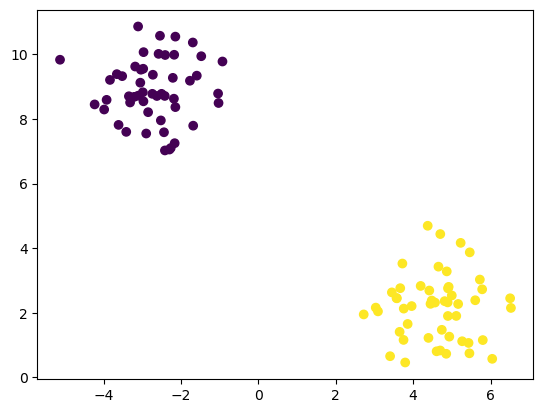

In [16]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

In [19]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
   intercept_scaling=1, max_iter=100, multi_class='warn', penalty='12',
   random_state=1, solver='lbfgs', tol=0.0001, warm_start=False)

LogisticRegression(multi_class='warn', penalty='12', random_state=1)

In [20]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [21]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

1.0

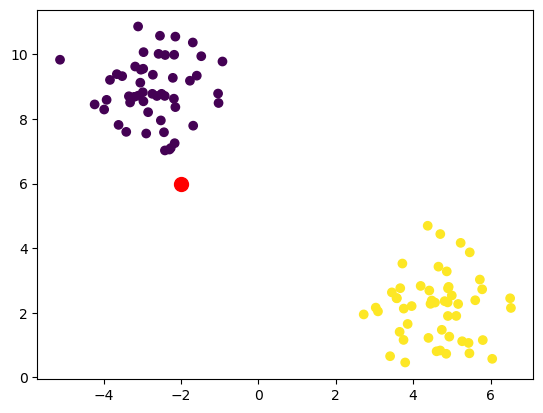

In [23]:
import numpy as np
new_data = np.array([[-2, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)
plt.show()

In [24]:
predictions = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {predictions}")


Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [0]


In [25]:
y = df["rating"]
X = df.drop(columns="rating")